##Here I am coding and implementing a Preceptron supervised learning model. The perceptron's biggest disadvantage is that it never converges if the classes are not perfectly linearly separable so you have to impute epochs if one chooses to use it so it eventually stops trying to converge. 

In [84]:
import json
import urllib
import pandas as pd
import numpy as np
import xlrd
import requests
import matplotlib

In [98]:
import numpy as np 
import sklearn
from sklearn.linear_model import Perceptron
#eta is the learning rate
#is the number of epochs -passes over the training set
def __init__(self, eta=0.01, n_iter=10):    
        self.eta = eta   
        self.n_iter = n_iter  
        def fit(self, X, y):     
            """Fit training data.        Parameters        ----------     
X : {array-like}, shape = [n_samples, n_features]      
Training vectors, where n_samples   
is the number of samples and   
n_features is the number of features.   
y : array-like, shape = [n_samples]           
self : object        """    
            self.w_ = np.zeros(1 + X.shape[1])   
            self.errors_ = []     
            for _ in range(self.n_iter):        
                errors = 0       
                for xi, target in zip(X, y):              
                    update = self.eta * (target - self.predict(xi))              
                    self.w_[1:] += update * xi          
                    self.w_[0] += update            
                    errors += int(update != 0.0)      
                    self.errors_.append(errors)     
                    return self 
                def net_input(self, X):   
                    """Calculate net input"""     
                    return np.dot(X, self.w_[1:]) + self.w_[0]  
                    def predict(self, X):  
                        """Return class label after unit step"""     
                        return np.where(self.net_input(X) >= 0.0, 1, -1)
                
print ("done")

done


In [86]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Extracting the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, respectively, and convert the class labels into the two integer class labels 1 (Versicolor) and -1 (Setosa) then assign them to vector y and the pandas DataFrame yields the corresponding NumPy representation. Then extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples and assign them to a feature matrix X, which we can visualize using a two-dimensional scatter plot

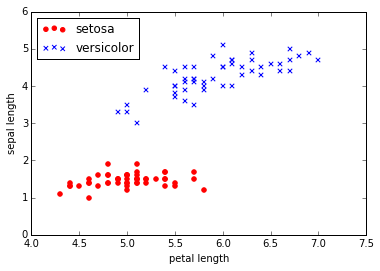

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Now train the perceptron on the data subsets above and report the mean accuracy score

In [100]:
ppn = Perceptron(eta0=0.1, n_iter=10)
ppn.fit(X, y)
ppn.score(X, y, sample_weight=None)
#from sklearn.metrics import accuracy_score
#print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


1.0

In [101]:
ppn.get_params(deep=True)

{'alpha': 0.0001,
 'class_weight': None,
 'eta0': 0.1,
 'fit_intercept': True,
 'n_iter': 10,
 'n_jobs': 1,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [102]:
ppn.decision_function(X)

array([-0.647, -0.597, -0.599, -0.47 , -0.622, -0.566, -0.522, -0.57 ,
       -0.472, -0.545, -0.67 , -0.468, -0.572, -0.603, -0.926, -0.745,
       -0.774, -0.647, -0.641, -0.595, -0.566, -0.595, -0.73 , -0.491,
       -0.312, -0.518, -0.518, -0.62 , -0.672, -0.443, -0.468, -0.67 ,
       -0.62 , -0.747, -0.545, -0.726, -0.799, -0.545, -0.524, -0.595,
       -0.674, -0.549, -0.524, -0.518, -0.387, -0.572, -0.543, -0.522,
       -0.645, -0.622,  0.594,  0.64 ,  0.723,  0.605,  0.667,  0.815,
        0.769,  0.391,  0.642,  0.628,  0.47 ,  0.609,  0.48 ,  0.819,
        0.372,  0.513,  0.84 ,  0.582,  0.69 ,  0.528,  0.921,  0.455,
        0.873,  0.819,  0.536,  0.538,  0.696,  0.825,  0.74 ,  0.295,
        0.501,  0.449,  0.478,  1.052,  0.89 ,  0.74 ,  0.669,  0.613,
        0.632,  0.605,  0.813,  0.767,  0.53 ,  0.366,  0.684,  0.659,
        0.659,  0.586,  0.185,  0.607])

The confidence scores which is the diference of that sample to the hyperplane